In [1]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 48kB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 3.8MB 47.7MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [1]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.0.0


In [0]:
!kill -9 -1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#memory that we can use
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12461648 kB


In [0]:
#hard disk that we can use
!df -h / | awk '{print $4}'

Avail
309G


In [94]:
from scipy.io import wavfile
from scipy.fftpack import fft
from os import listdir
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as dis
import re
import gzip
import tarfile

In [0]:
'''tar = tarfile.open('drive/My Drive/data_speech_commands_v0.02.tar.gz', "r:gz")
tar.extractall(path='drive/My Drive/speech')
tar.close()'''

In [0]:
'''%time
for tarinfo in tar:
    print(tarinfo.name)'''

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
.
./eight
./eight/1b88bf70_nohash_0.wav
./eight/798f702a_nohash_2.wav
./eight/b12bef84_nohash_1.wav
./eight/05b2db80_nohash_1.wav
./eight/b66f4f93_nohash_5.wav
./eight/750e3e75_nohash_0.wav
./eight/3852fca2_nohash_0.wav
./eight/5ac04a92_nohash_0.wav
./eight/778a4a01_nohash_0.wav
./eight/61e50f62_nohash_0.wav
./eight/0cb74144_nohash_2.wav
./eight/17c94b23_nohash_0.wav
./eight/037c445a_nohash_1.wav
./eight/3d794813_nohash_4.wav
./eight/11321027_nohash_0.wav
./eight/06f6c194_nohash_4.wav
./eight/b97c9f77_nohash_1.wav
./eight/10467b06_nohash_1.wav
./eight/321aba74_nohash_0.wav
./eight/d3831f6a_nohash_3.wav
./eight/d3831f6a_nohash_4.wav
./eight/baf01c1f_nohash_0.wav
./eight/472b8045_nohash_1.wav
./eight/64e48f55_nohash_1.wav
./eight/ab46af55_nohash_2.wav
./eight/6969e51a_nohash_0.wav
./eight/48bdc11c_nohash_0.wav
./eight/2e75d37a_nohash_1.wav
./eight/cb2929ce_nohash_4.wav
./eight/a6285644_nohash_2.wav
./eight/f30285c8_nohas

In [8]:
a = os.listdir('drive/My Drive/speech')
print(', '.join(a))

four, forward, off, five, on, six, down, house, two, visual, up, zero, three, stop, follow, happy, backward, learn, cat, right, eight, sheila, nine, yes, one, no, left, tree, bed, bird, go, wow, seven, marvin, dog, background_noise


In [9]:
a

['four',
 'forward',
 'off',
 'five',
 'on',
 'six',
 'down',
 'house',
 'two',
 'visual',
 'up',
 'zero',
 'three',
 'stop',
 'follow',
 'happy',
 'backward',
 'learn',
 'cat',
 'right',
 'eight',
 'sheila',
 'nine',
 'yes',
 'one',
 'no',
 'left',
 'tree',
 'bed',
 'bird',
 'go',
 'wow',
 'seven',
 'marvin',
 'dog',
 'background_noise']

### Model Building (Convultional)

In [5]:
import librosa
import librosa.display
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score, precision_recall_curve, roc_curve, auc
audio_path = 'C:/Users/My Computer/Desktop/DS projects/DSIA/Capstone project/speech recognition/data/'
labels = ['yes', 'no']

In [6]:
%time


all_wave = []
all_label = []
for label in labels:
  print(label)
  waves = [f for f in os.listdir(audio_path+label) if f.endswith('.wav')]#creating list of waves contains only .wav files
  b = round(len(waves)*0.25)# slicing size of data
  for wav in waves[:b]:
      samples, sample_rate = librosa.load(audio_path + label + '/'+wav, sr=8000)#compress the frequency 16kHz down to 8000Hz
      if(len(samples)== 8000) :
        all_wave.append(samples)
        all_label.append(label)

Wall time: 0 ns
yes
no


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:
import tensorflow.keras
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
y=np_utils.to_categorical(y, num_classes=len(labels))#make y as dummie variables

In [11]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
all_wave = np.array(all_wave).reshape(-1,8000,1)#reshape features to 1 dimensional dataset

In [13]:
from sklearn.model_selection import train_test_split
#80% of trainng size
X_train, X_val, y_train, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=1,shuffle=True)
print('Train: ',X_train.shape,y_train.shape)

Train:  (1424, 8000, 1) (1424, 2)


In [14]:
#20% of testing and validating data - 10% each
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size = 0.5,random_state=1,shuffle=True) # 20% for each testing and validating size
print('Validation: ',X_val.shape,y_val.shape)
print('Test: ',X_test.shape,y_test.shape)

Validation:  (178, 8000, 1) (178, 2)
Test:  (179, 8000, 1) (179, 2)


Model Architect - CNN (Convolutional Neural Network)

In [15]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Conv2D, Input, MaxPooling1D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
K.clear_session()

In [16]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
history=model.fit(X_train, y_train ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(X_val,y_val))

Train on 1424 samples, validate on 178 samples
Epoch 1/10
1424/1424 [==============================] - 159s 111ms/sample - loss: 0.6817 - accuracy: 0.5772 - val_loss: 0.6655 - val_accuracy: 0.6629
Epoch 2/10
1424/1424 [==============================] - 149s 104ms/sample - loss: 0.6420 - accuracy: 0.6369 - val_loss: 0.6348 - val_accuracy: 0.6573
Epoch 3/10
1424/1424 [==============================] - 116s 82ms/sample - loss: 0.5756 - accuracy: 0.7001 - val_loss: 0.5572 - val_accuracy: 0.7528
Epoch 4/10
1424/1424 [==============================] - 125s 88ms/sample - loss: 0.5062 - accuracy: 0.7753 - val_loss: 0.4804 - val_accuracy: 0.8034
Epoch 5/10
1424/1424 [==============================] - 141s 99ms/sample - loss: 0.4496 - accuracy: 0.8083 - val_loss: 0.4268 - val_accuracy: 0.8539
Epoch 6/10
1424/1424 [==============================] - 117s 82ms/sample - loss: 0.4230 - accuracy: 0.8237 - val_loss: 0.4521 - val_accuracy: 0.7640
Epoch 7/10
1424/1424 [==============================] - 1

### Evaluating Model

Training model

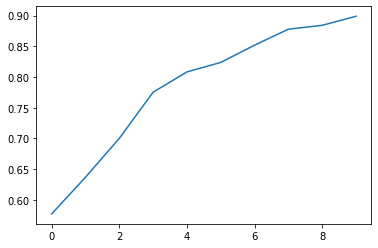

In [21]:
plt.plot(history.history['accuracy'])
plt.show()

Validating model

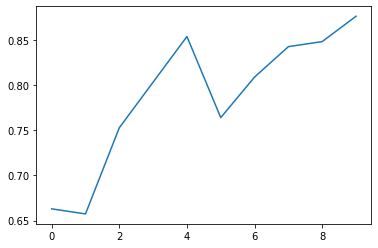

In [22]:
plt.plot(history.history['val_accuracy'])
plt.show()

Visualising Cost

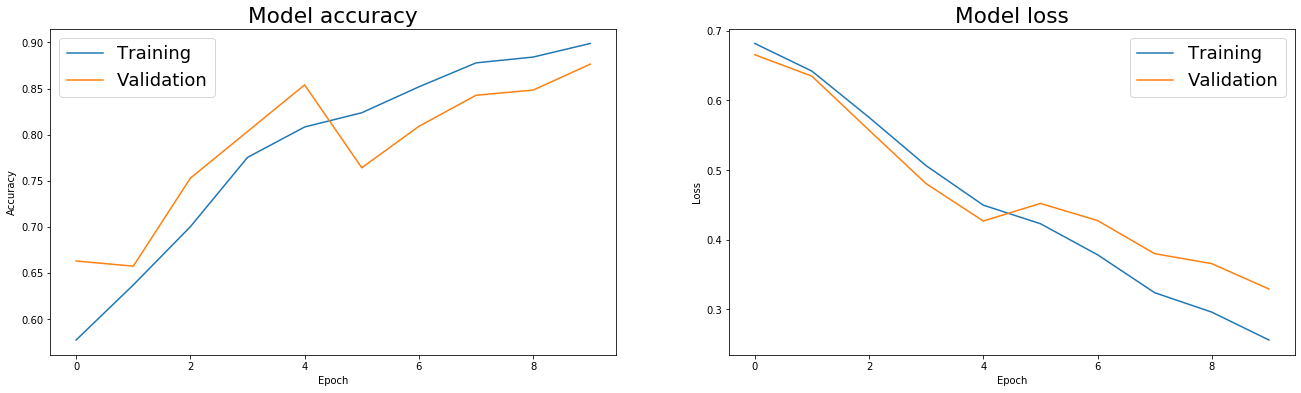

In [23]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'], label = 'Training')
ax[0].plot(model.history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [82]:
# plot learning curves
from mlxtend.plotting import plot_learning_curves
plt.figure()
plot_learning_curves(X_train, y_train, X_val, y_val, model, print_model = False, style = 'ggplot')
plt.show()
# High bias, low variance => underfitting

Train on 142 samples
142/142 [==============================] - 10s 71ms/sample - loss: 0.2520 - accuracy: 0.9155
Train on 284 samples
284/284 [==============================] - 19s 67ms/sample - loss: 0.2916 - accuracy: 0.8803
Train on 427 samples
427/427 [==============================] - 45s 105ms/sample - loss: 0.2486 - accuracy: 0.8759
Train on 569 samples
569/569 [==============================] - 51s 90ms/sample - loss: 0.2142 - accuracy: 0.9244
Train on 712 samples
288/712 [===========>..................] - ETA: 50s - loss: 0.2475 - accuracy: 0.9023

KeyboardInterrupt: 

<Figure size 842.4x595.44 with 0 Axes>

## Create predictions and evaluate

In [25]:
# Use the model to make predictions from our validation data
%%time
predictions = model.predict(X_test)

Wall time: 4.37 s


In [62]:
print('accuracy_score: ', accuracy_score(y_test, predictions.round()))
print('roc_score: ', roc_auc_score(y_test, predictions.round()))

accuracy_score:  0.9050279329608939
roc_score:  0.9038848378174502


Confusion Matrix

In [66]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [67]:
y_test_target = np.array([x.argmax() for x in y_test])
predictions_test_target = np.array([x.argmax() for x in predictions.round()])
cm = confusion_matrix(y_test_target, predictions_test_target)
%matplotlib inlineprint_cm(cm)

  |  0  1 
----------
 0| 89  8 
 1|  9 73 


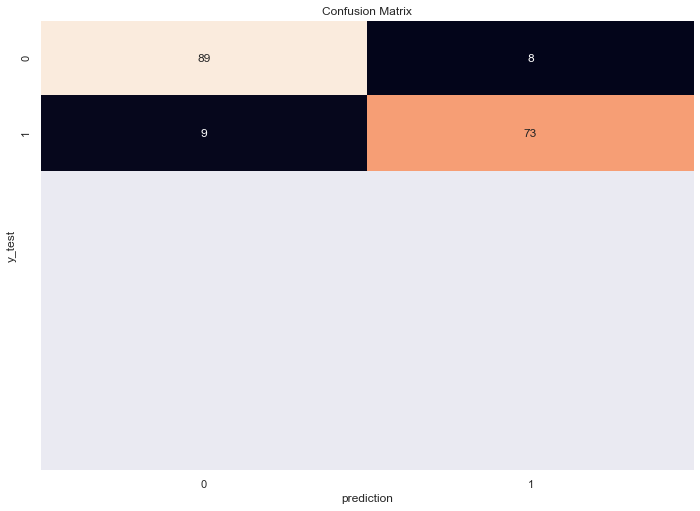

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cm,annot=True,cbar=False)
ax.set_ylim(6.0, 0)
plt.ylabel('y_test')
plt.xlabel('prediction')
plt.title('Confusion Matrix')
plt.show()

### ROC curve

In [83]:
fpr, tpr, thr = roc_curve(y_test_target, predictions_test_target)
roc_auc = auc(fpr, tpr)

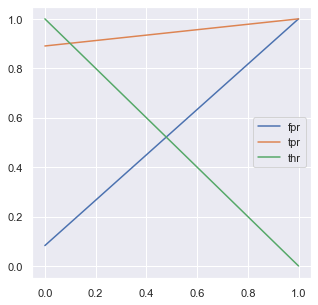

In [84]:
plt.figure(figsize=(5, 5))
plt.plot(range(len(thr)-1), fpr[1:], label='fpr')
plt.plot(range(len(thr)-1), tpr[1:], label='tpr')
plt.plot(range(len(thr)-1), thr[1:], label='thr')
plt.legend()
plt.show()

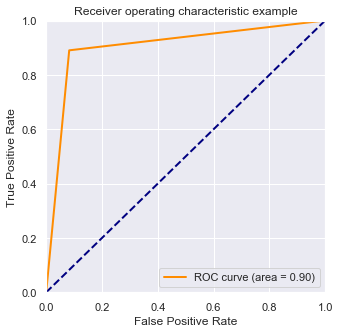

In [85]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

### Saving and Deploying Model

##### Convert to TF Lite

In [87]:
import tensorflow as tf

In [88]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("model.tflite", "wb").write(tflite_model)

1619496

##### Write to C file (required to be run on as adminnistration)

In [96]:
# Install xxd if it is not available
apt-get -qq install xxd
# Save the file as a C source file
xxd -i model.tflite > model.cc
# Print the source file
#!cat sine_model_quantized.cc